<a href="https://colab.research.google.com/github/ReshmiMaulik/Data-Sets-for-Projects/blob/main/CAR_Pricing_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ReshmiMaulik/Data-Sets-for-Projects.git

Cloning into 'Data-Sets-for-Projects'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 22 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [2]:
#Predicting price of pre-owned cars
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
#Setting dimension for plot
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [8]:
#Reading CSV file
cars_data= pd.read_csv('/content/Data-Sets-for-Projects/cars_sampled.csv')

In [9]:
#Structure of the data set
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [10]:
cars_data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [11]:
#creating a copy of the data
cars=cars_data.copy()

In [12]:
#Summarising the data
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [15]:
pd.set_option('display.float_format',lambda x:'%.3f'% x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [17]:
#To display the maximum set of columns
pd.set_option('display.max_columns',500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [19]:
#Dropping unwanted columns
col=['dateCrawled','name','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col,axis=1)

In [21]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               50001 non-null  object
 1   offerType            50001 non-null  object
 2   price                50001 non-null  int64 
 3   abtest               50001 non-null  object
 4   vehicleType          44813 non-null  object
 5   yearOfRegistration   50001 non-null  int64 
 6   gearbox              47177 non-null  object
 7   powerPS              50001 non-null  int64 
 8   model                47243 non-null  object
 9   kilometer            50001 non-null  int64 
 10  monthOfRegistration  50001 non-null  int64 
 11  fuelType             45498 non-null  object
 12  brand                50001 non-null  object
 13  notRepairedDamage    40285 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.3+ MB


In [22]:
#Removing duplicate records
cars.drop_duplicates(keep='first',inplace=True)

In [23]:
#Data Cleaning
#No. of missing values in each column
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [29]:
#variable years_of_registration(setting working range 1950-2020)
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()
sum(cars['yearOfRegistration']>2020)
sum(cars['yearOfRegistration']<1950)


38

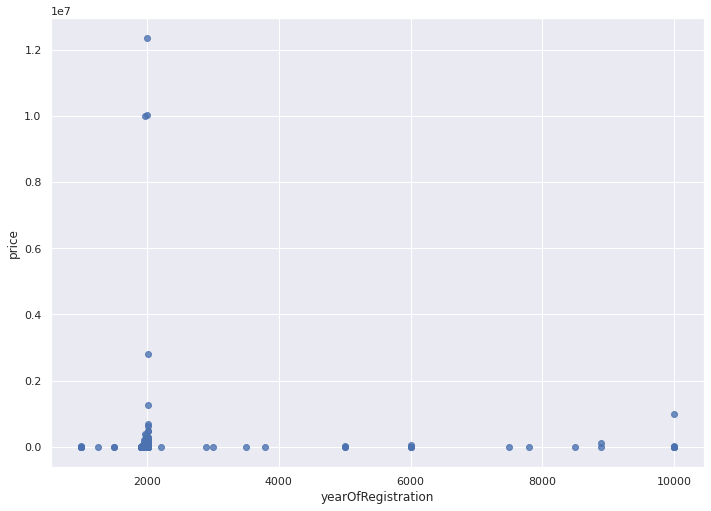

In [27]:
sns.regplot(x='yearOfRegistration',y='price',scatter=True,fit_reg=False,data=cars)

In [30]:
# variable Price
price_count=cars['price'].value_counts().sort_index()
sum(cars['price']>150000)
sum(cars['price']<100)


1748

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


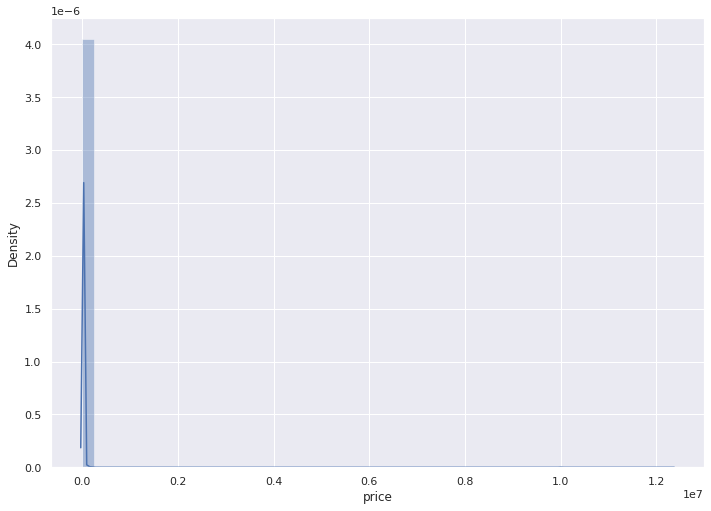

In [31]:
sns.distplot(cars['price'])

In [32]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

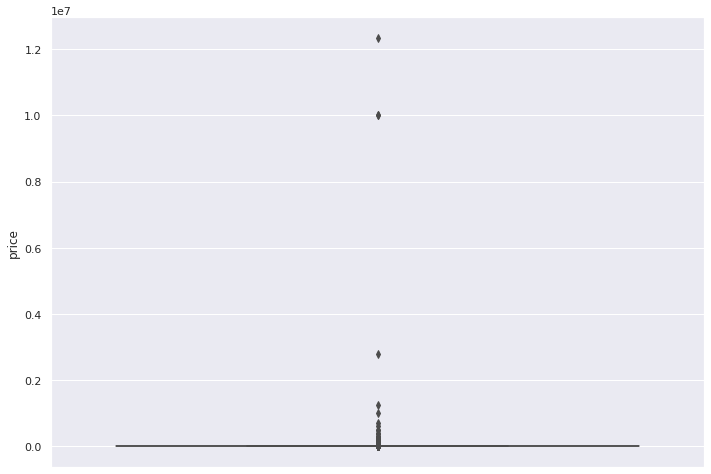

In [33]:
sns.boxplot(y=cars['price']) #presence of outliers

In [34]:
# variable powerPS
power_count=cars['powerPS'].value_counts().sort_index()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


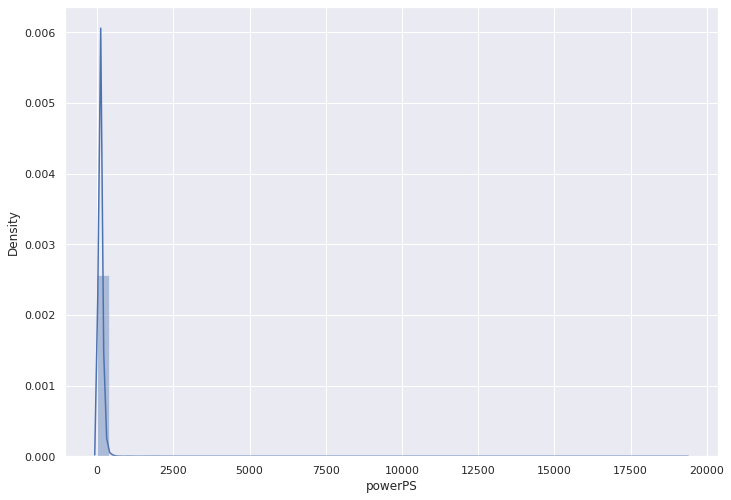

In [35]:
sns.distplot(cars['powerPS']) #Shows extreme values

In [36]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

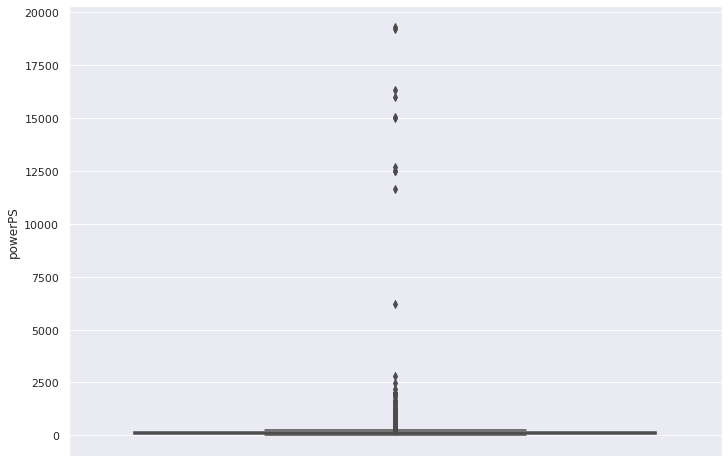

In [37]:
sns.boxplot(y=cars['powerPS'])

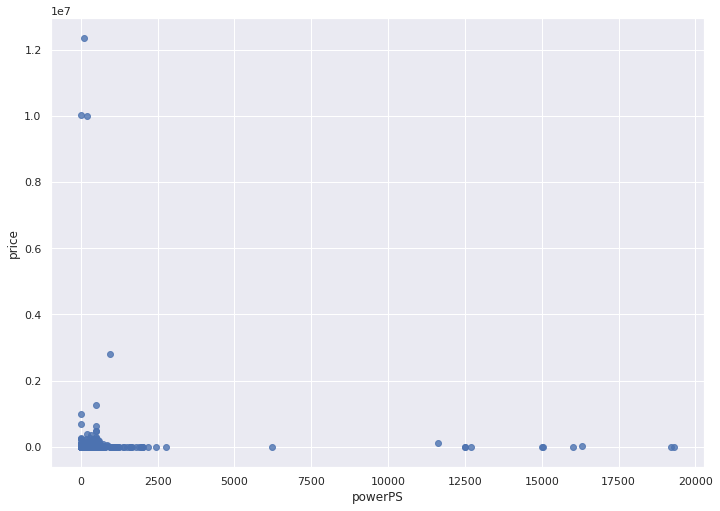

In [38]:
sns.regplot(x='powerPS',y='price',scatter=True,fit_reg=False,data=cars)

In [39]:
#setting working range between 10 and 500
sum(cars['price']>10)
sum(cars['price']<500)

4777

In [41]:
#Working range of data
cars=cars[
          (cars.yearOfRegistration<=2020)
          &(cars.yearOfRegistration>=1950)
          &(cars.price>=100)
          &(cars.price<=150000)
          &(cars.powerPS>=10)
          &(cars.powerPS<=500)]

In [44]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42772 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               42772 non-null  object
 1   offerType            42772 non-null  object
 2   price                42772 non-null  int64 
 3   abtest               42772 non-null  object
 4   vehicleType          39896 non-null  object
 5   yearOfRegistration   42772 non-null  int64 
 6   gearbox              41978 non-null  object
 7   powerPS              42772 non-null  int64 
 8   model                41089 non-null  object
 9   kilometer            42772 non-null  int64 
 10  monthOfRegistration  42772 non-null  int64 
 11  fuelType             40175 non-null  object
 12  brand                42772 non-null  object
 13  notRepairedDamage    36495 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.9+ MB


In [45]:
#Further to simplify, variable reduction
cars['monthOfRegistration']/=12

In [47]:
#creating a new variable Age by adding yearOfRegistration and monthOfRegistration
cars['Age']=(2020-cars['yearOfRegistration'])+ cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

count   42772.000
mean       16.873
std         7.093
min         2.000
25%        12.330
50%        16.830
75%        21.170
max        69.750
Name: Age, dtype: float64

In [54]:
cars.columns

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'Age'],
      dtype='object')

In [52]:
# dropping yearOfRegistration and monthOfRegistration
#cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'])

KeyError: ignored

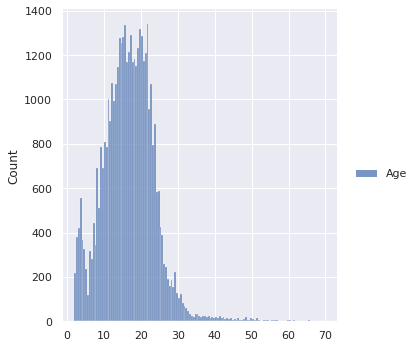

In [55]:
#visualizing Age
sns.displot(cars[['Age']])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


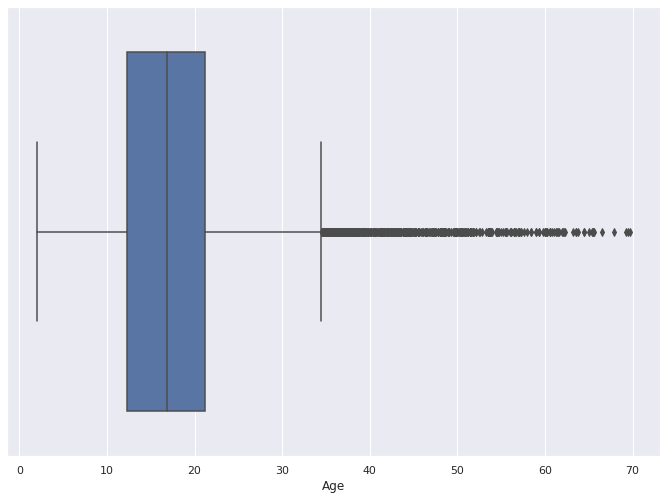

In [56]:
sns.boxplot(cars['Age'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


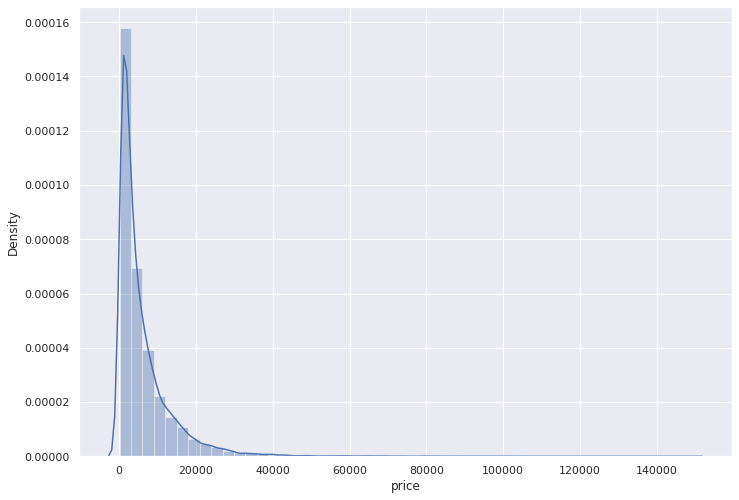

In [57]:
#Price
sns.distplot(cars['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


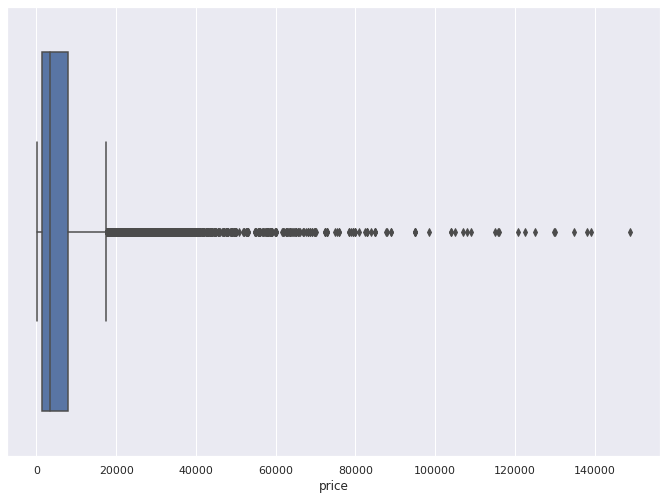

In [58]:
sns.boxplot(cars['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


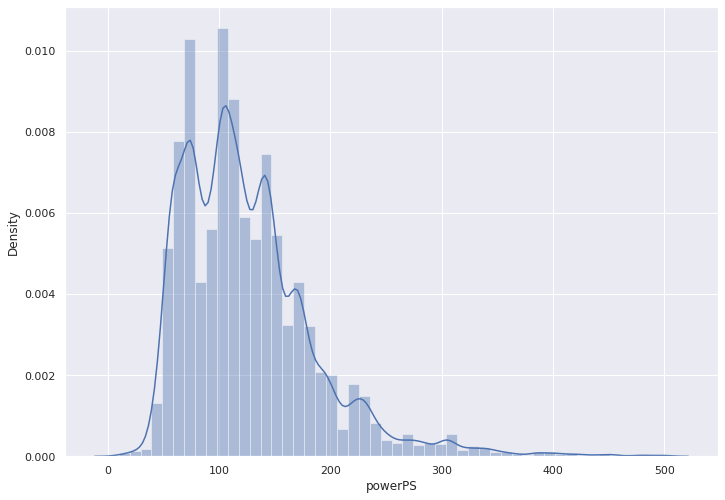

In [59]:
sns.distplot(cars['powerPS'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


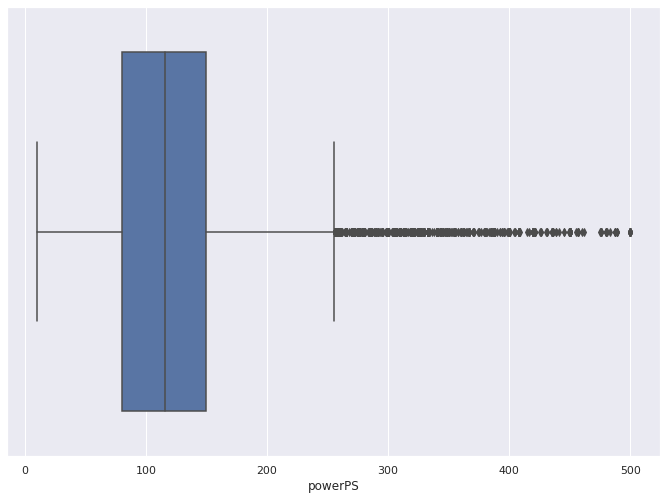

In [60]:
sns.boxplot(cars['powerPS'])

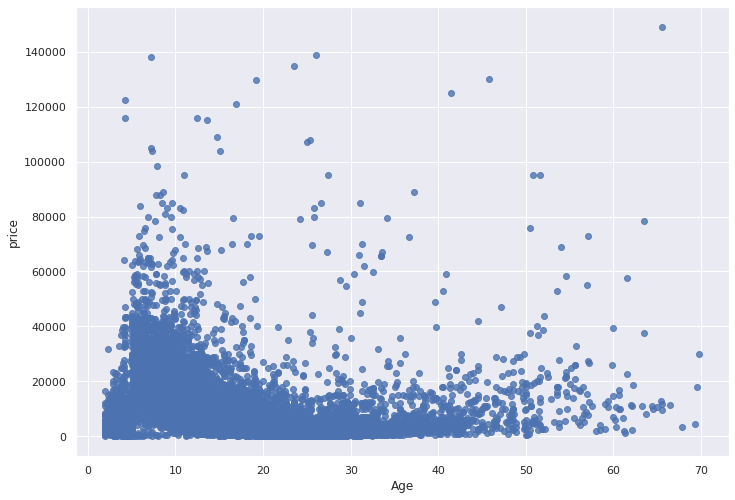

In [61]:
#Visualizing parameters after narrowing down the range
#Age vs Price
sns.regplot(x='Age',y='price',scatter=True,fit_reg=False,data=cars)

In [ ]:
# Cars priced higher are newer.
# with increase in age, price decreases. 
#only few cars are priced higher with age.

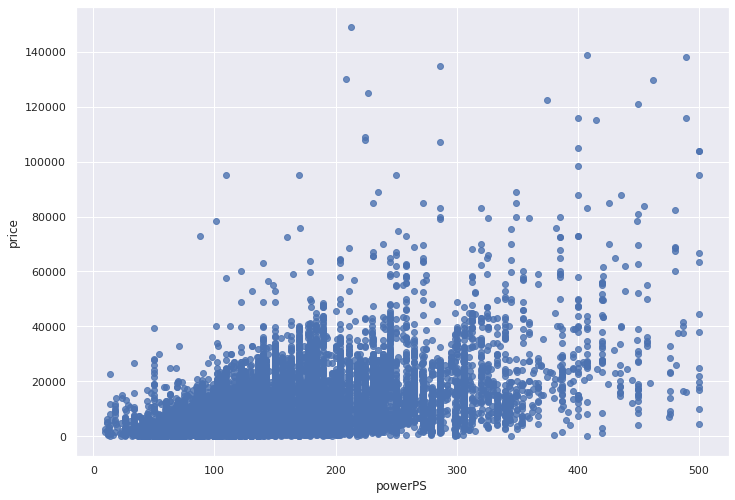

In [62]:
#PowerPS vs price
sns.regplot(x='powerPS',y='price',scatter=True,fit_reg=False,data=cars)

In [64]:
# With increase in PowerPS, price increases
#Categorical Variable(seller)
cars['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [65]:
pd.crosstab(cars['seller'],columns='count',normalize=True)

col_0,count
seller,
commercial,0.000
private,1.000


Commercial insignificant

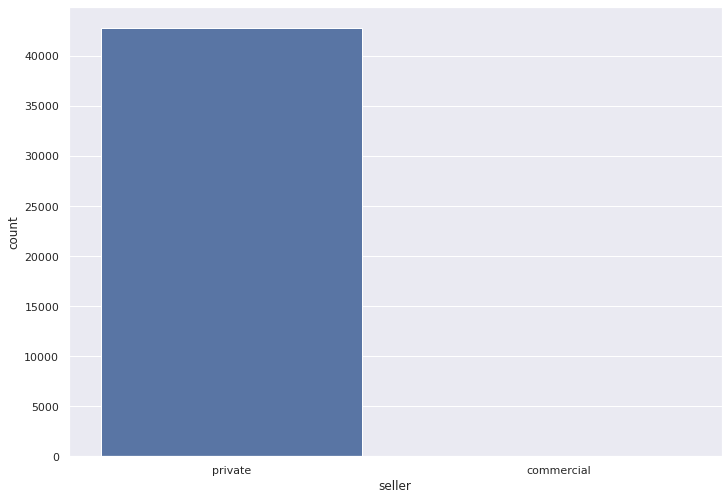

In [66]:
sns.countplot(x='seller',data=cars)

Fewer cars have commercial-->insignificant

In [67]:
# Variable offerType
cars['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

In [68]:
pd.crosstab(cars['offerType'],columns='count',normalize=True)

col_0,count
offerType,
offer,1.000


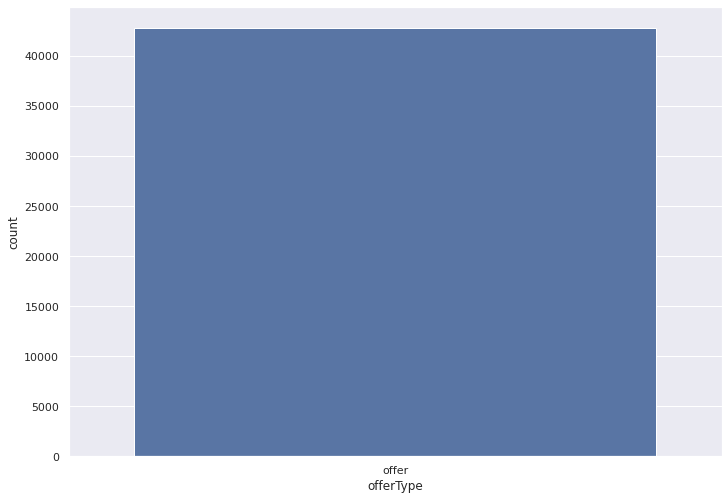

In [69]:
sns.countplot(x='offerType',data=cars)

In [70]:
# Variable abtest
cars['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [71]:
pd.crosstab(cars['abtest'],columns='count',normalize=True)

col_0,count
abtest,
control,0.483
test,0.517


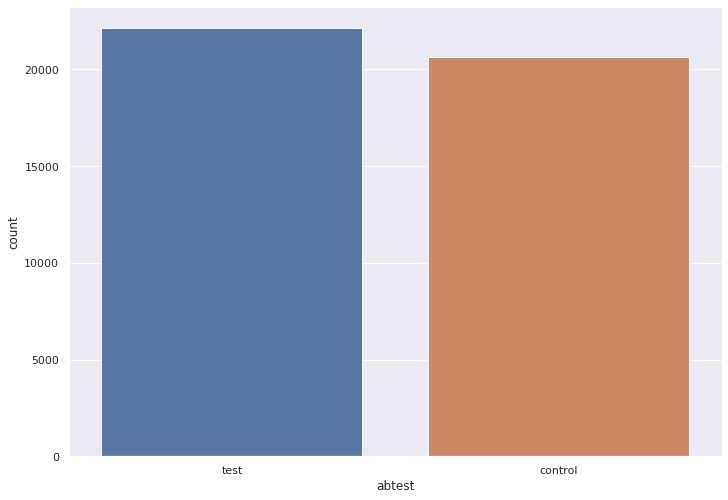

In [72]:
sns.countplot(x='abtest',data=cars)

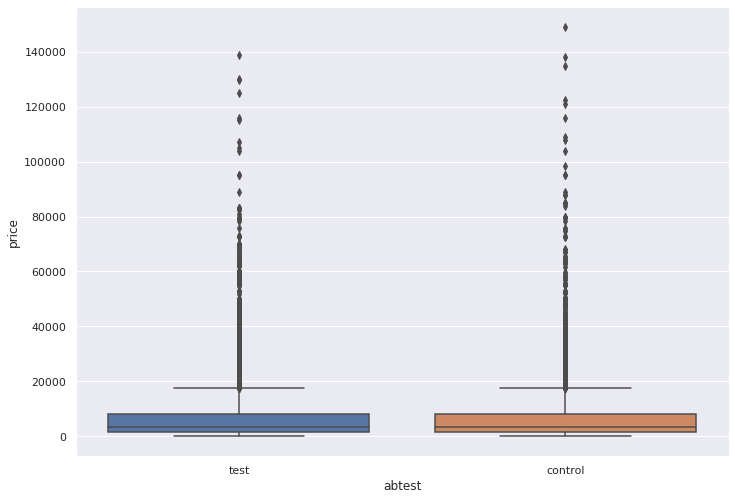

In [73]:
#Equally distributed
sns.boxplot(x='abtest',y='price',data=cars)

For every price it is 50-50 distribution. So abtest is insignificant.

In [74]:
cars['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

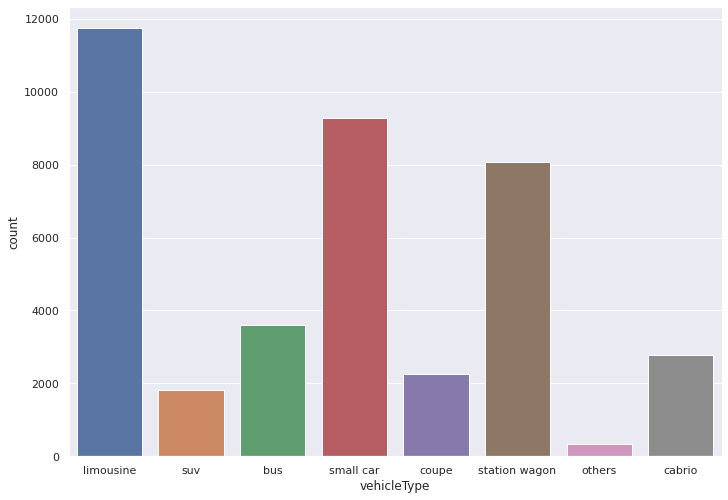

In [75]:
sns.countplot(x='vehicleType',data=cars)

In [76]:
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


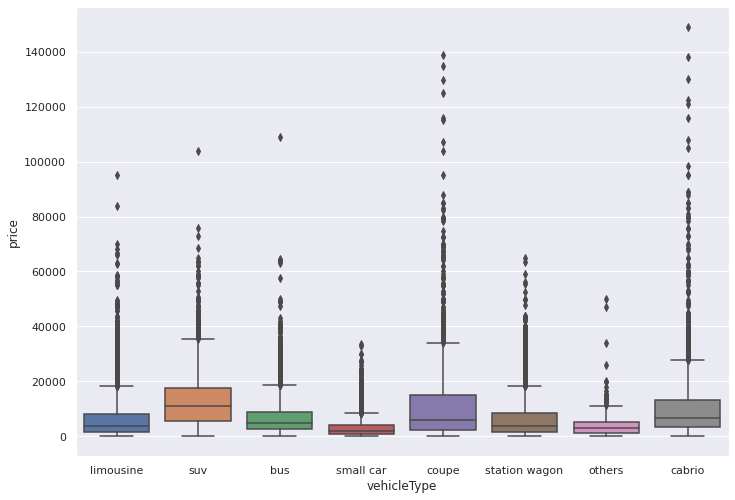

In [77]:
sns.boxplot(x='vehicleType',y='price',data=cars)

Vehicle Type effect price

In [78]:
# Variable gearbox
cars['gearbox'].value_counts()


manual       32582
automatic     9396
Name: gearbox, dtype: int64

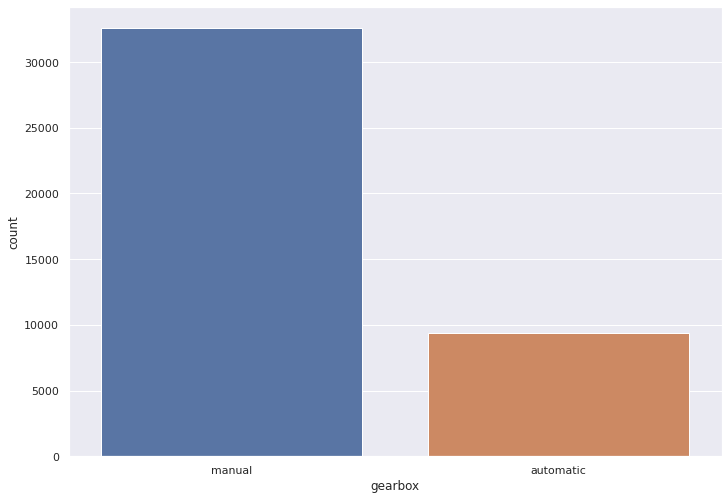

In [80]:
sns.countplot(x='gearbox',data=cars)

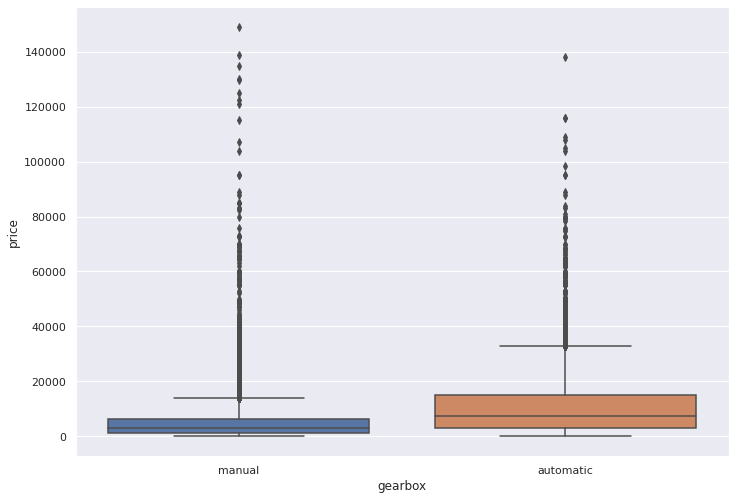

In [79]:
sns.boxplot(x='gearbox',y='price',data=cars)

gearbox does effect price so have to retain in final model.

In [81]:
#variable model
cars['model'].value_counts()

golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
serie_2          1
200              1
serie_3          1
charade          1
rangerover       1
Name: model, Length: 247, dtype: int64

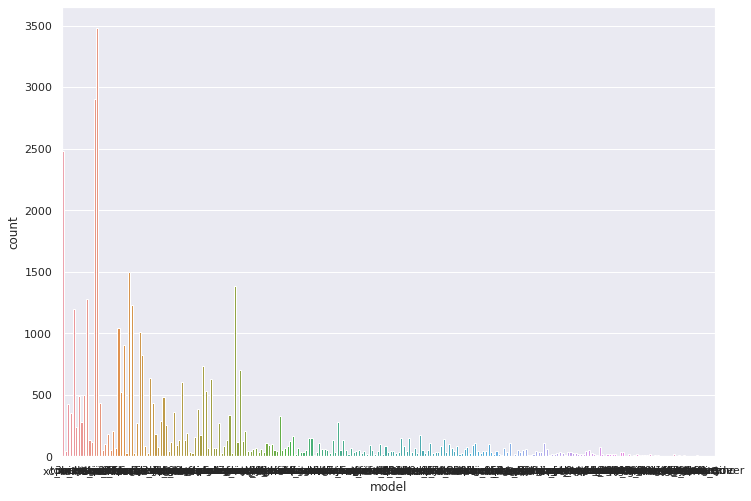

In [83]:
sns.countplot(x='model',data=cars)

In [85]:
pd.crosstab(cars['model'],columns='count',normalize=True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
...,...
yaris,0.003
yeti,0.001
ypsilon,0.001


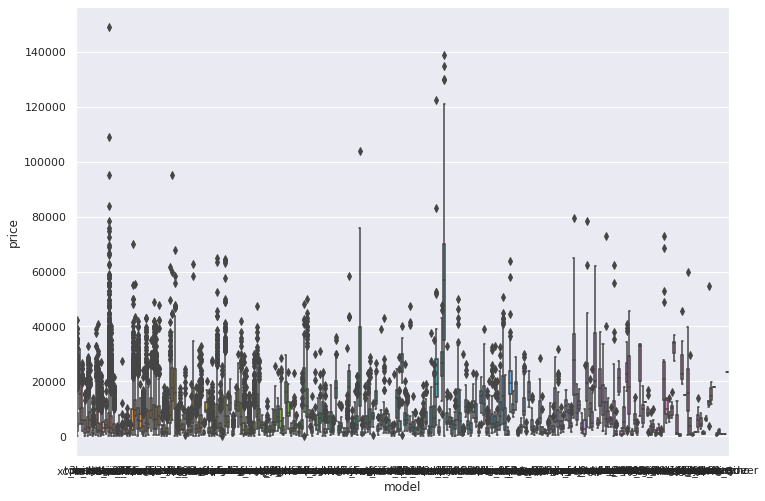

In [86]:
sns.boxplot(x='model',y='price',data=cars)

In [87]:
#variable Kilometer
cars['kilometer'].value_counts().sort_index()

5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64

In [88]:
pd.crosstab(cars['kilometer'],columns='count',normalize=True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


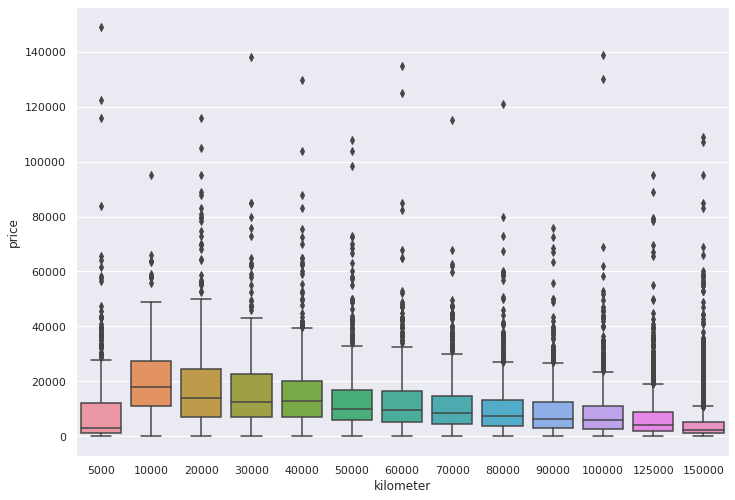

In [90]:
sns.boxplot(x='kilometer',y='price',data=cars)

Different kilometers effect price..Cars covered larger distances have lower prices.

In [92]:
cars['kilometer'].describe()

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

In [94]:
# variable fuelType
cars['fuelType'].value_counts()

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

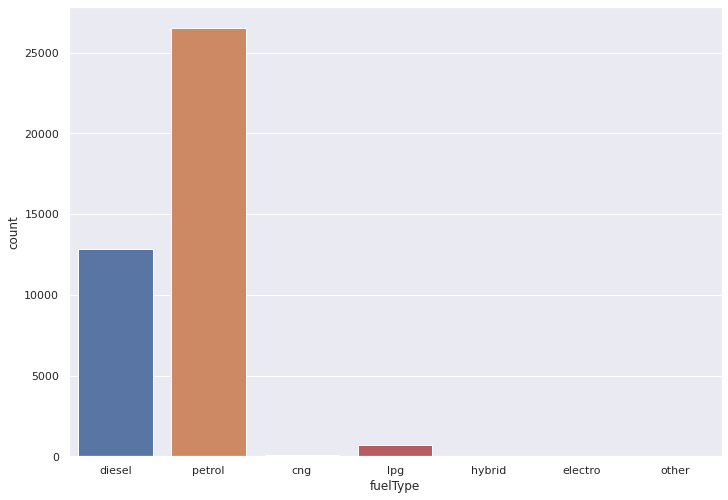

In [95]:
sns.countplot(x='fuelType',data=cars)

In [96]:
pd.crosstab(cars['fuelType'],columns='count',normalize=True)

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


Petrol is leading by 66%

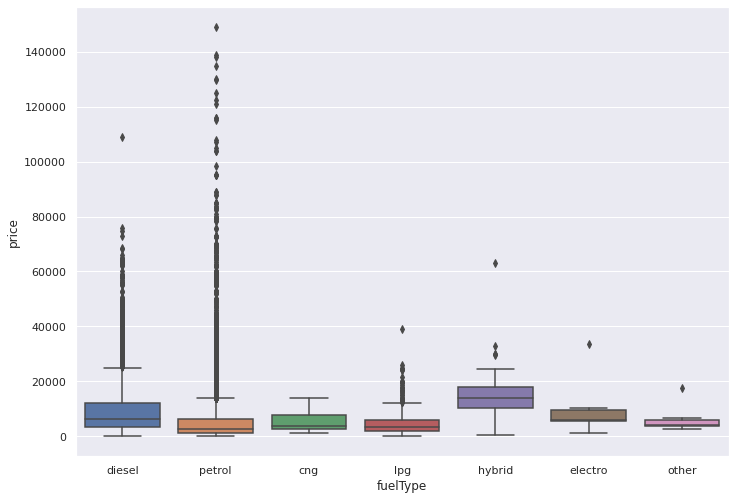

In [97]:
sns.boxplot(x='fuelType',y='price',data=cars)

FuelType does effect price. Clear from BoxPlot.

In [98]:
cars.columns

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'Age'],
      dtype='object')

In [99]:
#variable brand
cars['brand'].value_counts()

volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
daewoo              53
rover               53
trabant             43
lada                22
Name: brand, dtype: int64

In [100]:
pd.crosstab(cars['brand'],columns='count',normalize=True)

col_0,count
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


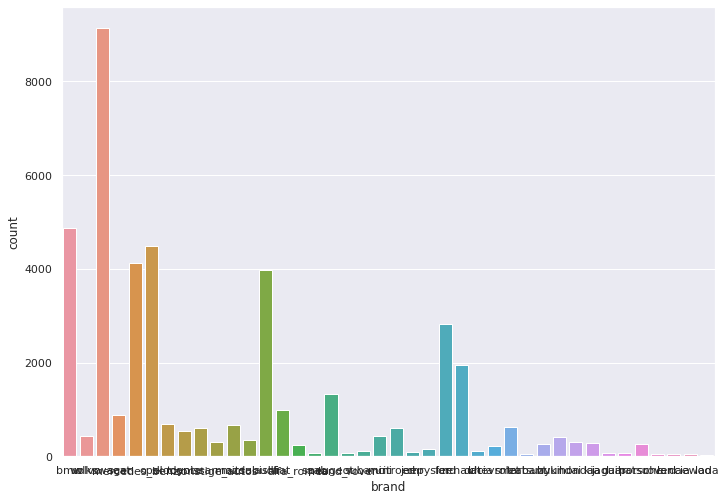

In [101]:
sns.countplot(x='brand',data=cars)

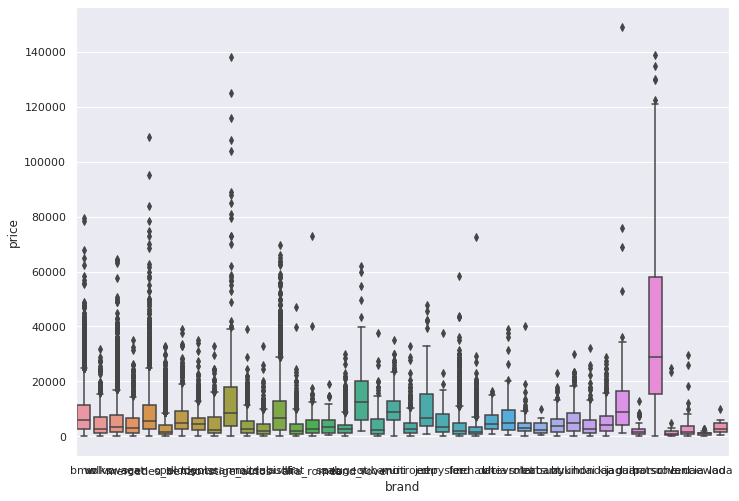

In [102]:
sns.boxplot(x='brand',y='price',data=cars)

Brand do effect on price.

In [104]:
# variable notRepairedDamage
cars['notRepairedDamage'].value_counts()

no     32507
yes     3988
Name: notRepairedDamage, dtype: int64

In [106]:
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)

col_0,count
notRepairedDamage,
no,0.891
yes,0.109


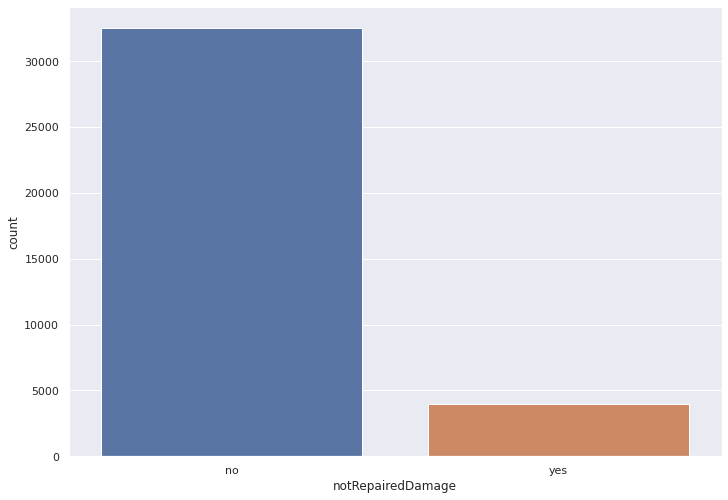

In [107]:
sns.countplot(x='notRepairedDamage',data=cars)

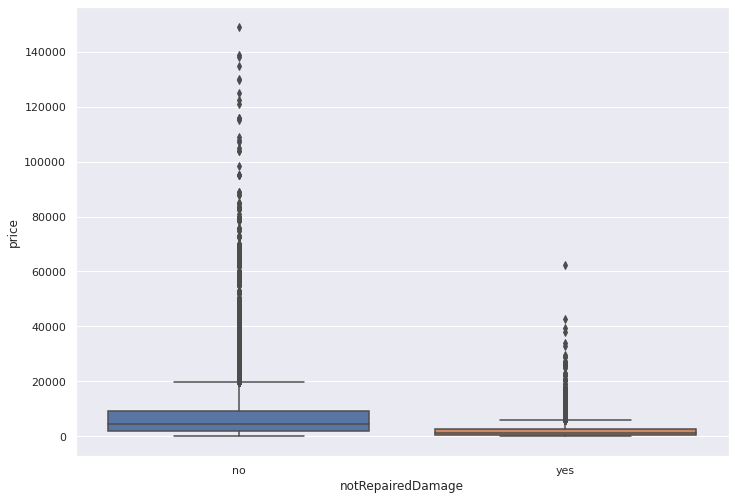

In [103]:
sns.boxplot(x='notRepairedDamage',y='price',data=cars)

Cars repaired are priced higher.

In [108]:
# Removing insignificant variables
col=['seller','abtest','offerType']
cars=cars.drop(columns=col,axis=1)

In [109]:
cars_copy=cars.copy()

In [111]:
#Correlation to check heavy dependency on price
cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
round(correlation,3)

,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,-0.336
powerPS,0.575,1.000,-0.016,-0.151
kilometer,-0.440,-0.016,1.000,0.292
Age,-0.336,-0.151,0.292,1.000


In [112]:
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

In [113]:
# Model building using linear regression
# Omitting missing values from rows
cars_omit=cars.dropna(axis=0)

In [114]:
#Converting categorical variables to dummy variables
cars_omit=pd.get_dummies(cars_omit,drop_first=True)

In [115]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [116]:
#Model building with ommitted data
# Separate input and output features
X1=cars_omit.drop(['price'],axis='columns',inplace=False)
y1=cars_omit['price']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe216e2d780>,
      dtype=object)

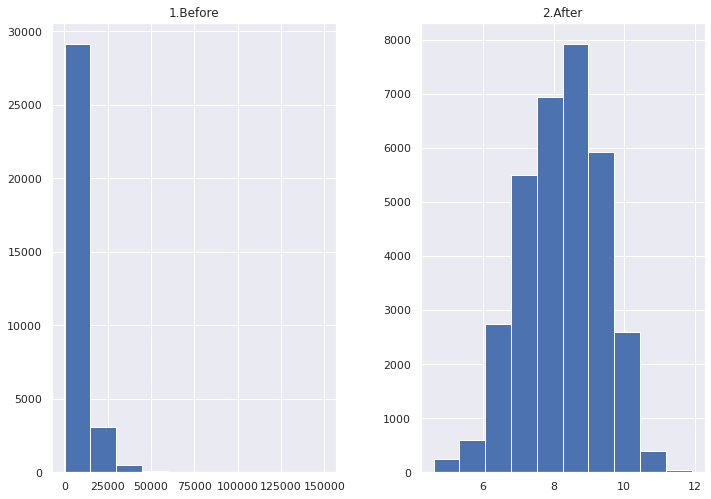

In [118]:
#Plotting the variable price
prices=pd.DataFrame({"1.Before":y1,"2.After":np.log(y1)})
prices.hist()

In [119]:
# Transforming price as logarithmic value
y1=np.log(y1)

In [120]:
#Splitting the data into test and train
X_train, X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3,random_state=3)
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


In [121]:
#Baseline model for ommitted data
#Finding the mean for test data value
base_pred=np.mean(y_test)
print(base_pred)

8.249615787653337


In [122]:
#Repeating same value till length of test data
base_pred=np.repeat(base_pred,len(y_test))

In [124]:
#Finding the RMSE
base_root_mean_square_error=np.sqrt(mean_squared_error(y_test,base_pred))
print(base_root_mean_square_error)

1.1274483657478247


In [125]:
#Linear regression with ommitted data
#setting intercept as true
lgr=LinearRegression(fit_intercept=True)
# Model
model_lin1=lgr.fit(X_train,y_train)
#predicting model on test set
car_predictions_lin1=lgr.predict(X_test)

In [129]:
#Computing RMSE and MSE
lin_mse1=mean_squared_error(y_test,car_predictions_lin1)
lin_rmse1=np.sqrt(lin_mse1)
print(lin_mse1)
print(lin_rmse1)

0.2976227584928367
0.545548126651386


In [131]:
# How good the model is able to explain the variability? R squared value
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
print(r2_lin_test1,r2_lin_train1)


0.7658615091649227 0.7800936978183916


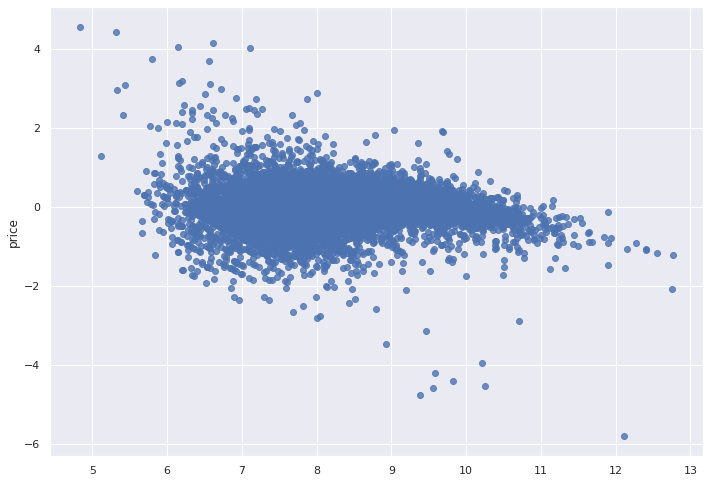

In [133]:
#Regression Diagonistics-Residual plot analysis
residuals1=y_test-car_predictions_lin1
sns.regplot(x=car_predictions_lin1,y=residuals1,scatter=True,fit_reg=False,data=cars)


In [134]:
residuals1.describe() # Errors are less as mean is 0.3%

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64